In [1]:
%matplotlib inline
import os, sys, glob
import numpy as np
from matplotlib import pyplot as plt
import mrcfile
# package up sometime?
sys.path.append('../../src/')
import cryoemio

# Setup

In [2]:
project_directory = '/Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing/'
starfile          = project_directory+'Extract/extract_one_2dclass/particles_subset.star'

# Read star files from RELION

## load content of star file into python dictionary

In [3]:
star_content = cryoemio.star_reader(starfile)

Number of particles in this star file: 66
The entries in the returned dictionary are:
data['metadata'].keys(): ['_rlncoordinatex', '_rlncoordinatey', '_rlnautopickfigureofmerit', '_rlnclassnumber', '_rlnanglepsi', '_rlnimagename', '_rlnmicrographname', '_rlnmagnification', '_rlndetectorpixelsize', '_rlnctfmaxresolution', '_rlnctffigureofmerit', '_rlnvoltage', '_rlndefocusu', '_rlndefocusv', '_rlndefocusangle', '_rlnsphericalaberration', '_rlnctfbfactor', '_rlnctfscalefactor', '_rlnphaseshift', '_rlnamplitudecontrast', '_rlnoriginx', '_rlnoriginy', '_rlngroupnumber', '_rlnanglerot', '_rlnangletilt', '_rlnnormcorrection', '_rlnloglikelicontribution', '_rlnmaxvalueprobdistribution', '_rlnnrofsignificantsamples']


## plot two of its entries

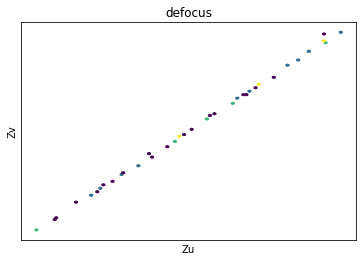

In [4]:
fig = plt.figure()
plt.hexbin(star_content['metadata']['_rlndefocusu'],star_content['metadata']['_rlndefocusv'], mincnt=1)
plt.title('defocus')
plt.xlabel('Zu')
plt.ylabel('Zv')
plt.show()

# Store star file with corresponding particles in hdf5 file

In [5]:
mrcs_directory    = project_directory+'/Extract/extract_one_2dclass/Micrographs/'
hdf5file = project_directory+'/Extract/test.h5'

In [6]:
cryoemio.star2hdf5(starfile, hdf5file, mrcs_directory)

> Reading star file...
Number of particles in this star file: 66
The entries in the returned dictionary are:
data['metadata'].keys(): ['_rlncoordinatex', '_rlncoordinatey', '_rlnautopickfigureofmerit', '_rlnclassnumber', '_rlnanglepsi', '_rlnimagename', '_rlnmicrographname', '_rlnmagnification', '_rlndetectorpixelsize', '_rlnctfmaxresolution', '_rlnctffigureofmerit', '_rlnvoltage', '_rlndefocusu', '_rlndefocusv', '_rlndefocusangle', '_rlnsphericalaberration', '_rlnctfbfactor', '_rlnctfscalefactor', '_rlnphaseshift', '_rlnamplitudecontrast', '_rlnoriginx', '_rlnoriginy', '_rlngroupnumber', '_rlnanglerot', '_rlnangletilt', '_rlnnormcorrection', '_rlnloglikelicontribution', '_rlnmaxvalueprobdistribution', '_rlnnrofsignificantsamples']
> Reading corresponding particle mrcs files...
> Writing particle images to h5 file...
> Writin metadata to h5 file...
> Done! Output at /Users/fpoitevi/gdrive/cryoEM/Projects/20181005-rib-TEM4/processing//Extract/test.h5


In [7]:
import h5py
data = h5py.File(hdf5file, 'r') 

In [8]:
data.keys()
particles = data['particles']

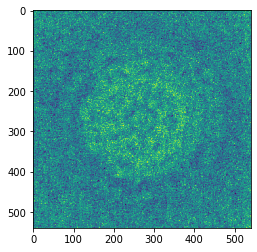

In [9]:
plt.imshow(np.mean(particles, axis=0))

In [10]:
data['_rlnimagename'][:]

array([b'000001@Extract/job289/Micrographs/Hasan_00063_aligned_DW.mrcs',
       b'000002@Extract/job289/Micrographs/Hasan_00063_aligned_DW.mrcs',
       b'000003@Extract/job289/Micrographs/Hasan_00063_aligned_DW.mrcs',
       b'000001@Extract/job289/Micrographs/Hasan_00064_aligned_DW.mrcs',
       b'000002@Extract/job289/Micrographs/Hasan_00064_aligned_DW.mrcs',
       b'000003@Extract/job289/Micrographs/Hasan_00064_aligned_DW.mrcs',
       b'000004@Extract/job289/Micrographs/Hasan_00064_aligned_DW.mrcs',
       b'000001@Extract/job289/Micrographs/Hasan_00066_aligned_DW.mrcs',
       b'000002@Extract/job289/Micrographs/Hasan_00066_aligned_DW.mrcs',
       b'000001@Extract/job289/Micrographs/Hasan_00068_aligned_DW.mrcs',
       b'000002@Extract/job289/Micrographs/Hasan_00068_aligned_DW.mrcs',
       b'000001@Extract/job289/Micrographs/Hasan_00073_aligned_DW.mrcs',
       b'000001@Extract/job289/Micrographs/Hasan_00074_aligned_DW.mrcs',
       b'000001@Extract/job289/Micrographs/Hasan_00

In [4]:
data = cryoemio.star_reader(starfile)

Number of particles in this star file: 66
The entries in the returned dictionary are:
data['metadata'].keys(): ['_rlncoordinatex', '_rlncoordinatey', '_rlnautopickfigureofmerit', '_rlnclassnumber', '_rlnanglepsi', '_rlnimagename', '_rlnmicrographname', '_rlnmagnification', '_rlndetectorpixelsize', '_rlnctfmaxresolution', '_rlnctffigureofmerit', '_rlnvoltage', '_rlndefocusu', '_rlndefocusv', '_rlndefocusangle', '_rlnsphericalaberration', '_rlnctfbfactor', '_rlnctfscalefactor', '_rlnphaseshift', '_rlnamplitudecontrast', '_rlnoriginx', '_rlnoriginy', '_rlngroupnumber', '_rlnanglerot', '_rlnangletilt', '_rlnnormcorrection', '_rlnloglikelicontribution', '_rlnmaxvalueprobdistribution', '_rlnnrofsignificantsamples']


In [23]:
key='_rlnimagename' #'_rlncoordinatex'
try: 
    array = np.array(data['metadata'][key], dtype='float_')
except:
    array = np.array(data['metadata'][key], dtype='str')
array

array(['000001@Extract/job289/Micrographs/Hasan_00063_aligned_DW.mrcs',
       '000002@Extract/job289/Micrographs/Hasan_00063_aligned_DW.mrcs',
       '000003@Extract/job289/Micrographs/Hasan_00063_aligned_DW.mrcs',
       '000001@Extract/job289/Micrographs/Hasan_00064_aligned_DW.mrcs',
       '000002@Extract/job289/Micrographs/Hasan_00064_aligned_DW.mrcs',
       '000003@Extract/job289/Micrographs/Hasan_00064_aligned_DW.mrcs',
       '000004@Extract/job289/Micrographs/Hasan_00064_aligned_DW.mrcs',
       '000001@Extract/job289/Micrographs/Hasan_00066_aligned_DW.mrcs',
       '000002@Extract/job289/Micrographs/Hasan_00066_aligned_DW.mrcs',
       '000001@Extract/job289/Micrographs/Hasan_00068_aligned_DW.mrcs',
       '000002@Extract/job289/Micrographs/Hasan_00068_aligned_DW.mrcs',
       '000001@Extract/job289/Micrographs/Hasan_00073_aligned_DW.mrcs',
       '000001@Extract/job289/Micrographs/Hasan_00074_aligned_DW.mrcs',
       '000001@Extract/job289/Micrographs/Hasan_00081_aligned_DW